In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("C:\\Users\\jhishna2022\\OneDrive\\Desktop\\Assignments\\Assignment13_KNN\\glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### EDA

In [5]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [6]:
df.shape

(214, 10)

In [7]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [9]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

## Visualization of data

### Correation

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


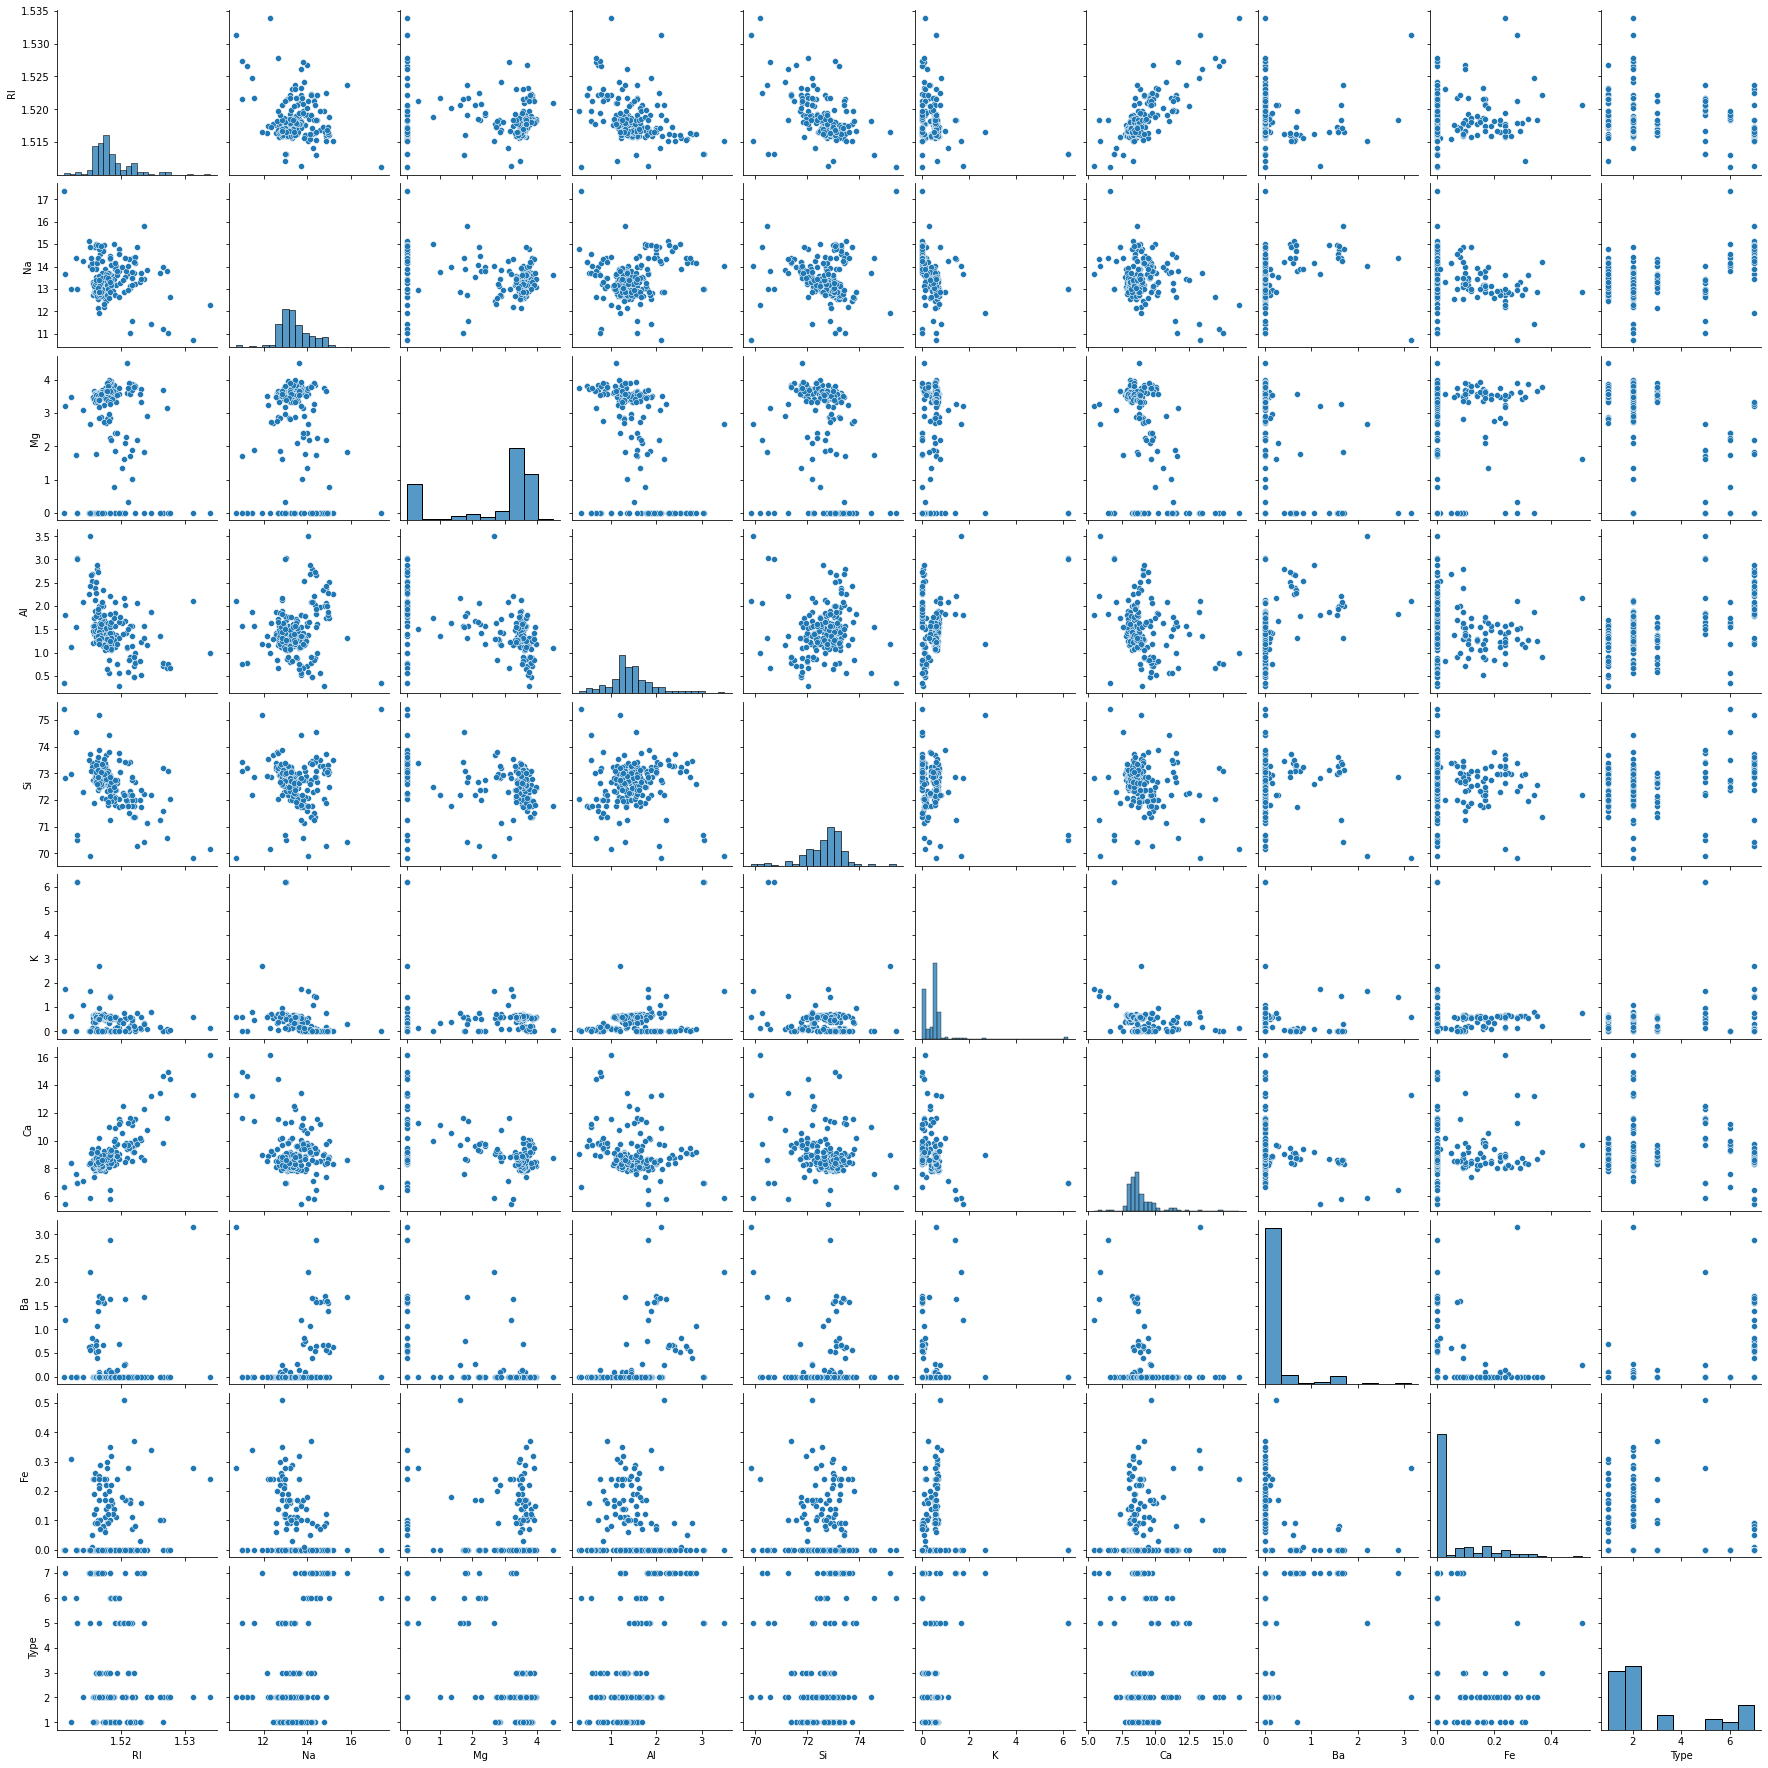

In [12]:
sns.pairplot(df)

### Feature importance

<AxesSubplot:>

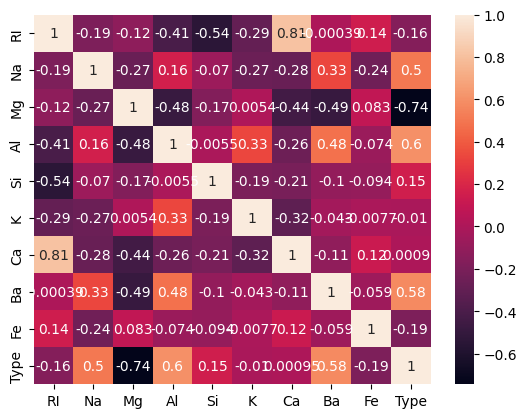

In [13]:
sns.heatmap(df.corr(),annot = True)

In [14]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

<BarContainer object of 6 artists>

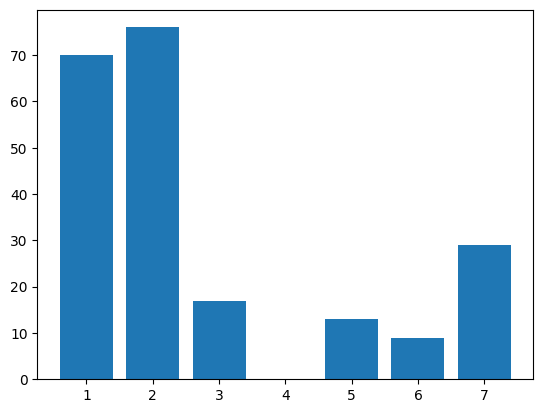

In [15]:
t1 = [1,2,3,5,6,7]
t2 = [70,76,17,13,9,29]
plt.bar(t1,t2)

In [16]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='RI', ylabel='Type'>

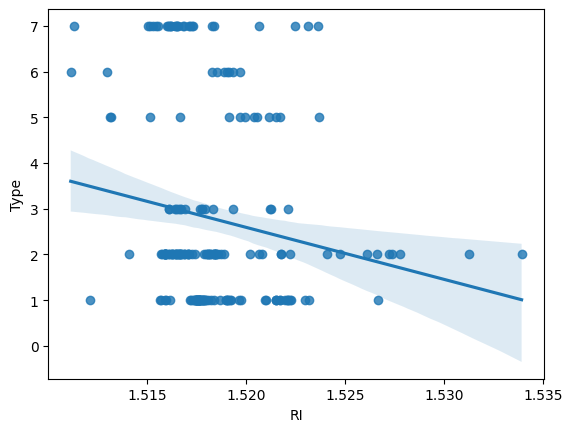

In [17]:
import seaborn as sns
sns.regplot(df['RI'],df['Type'])

<AxesSubplot:xlabel='RI', ylabel='Density'>

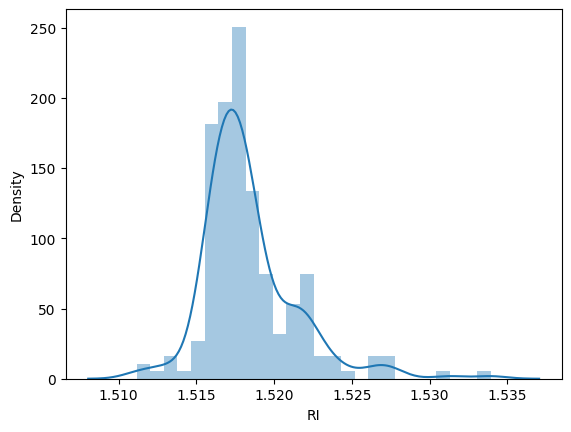

In [18]:
sns.distplot(df['RI'])

<AxesSubplot:xlabel='Na', ylabel='Type'>

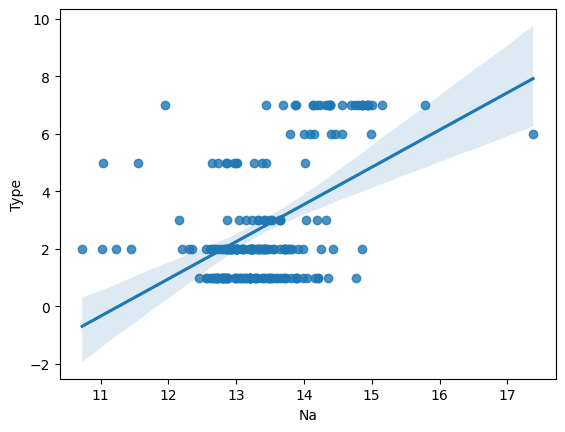

In [19]:
sns.regplot(df['Na'],df['Type'])

<AxesSubplot:xlabel='Mg', ylabel='Type'>

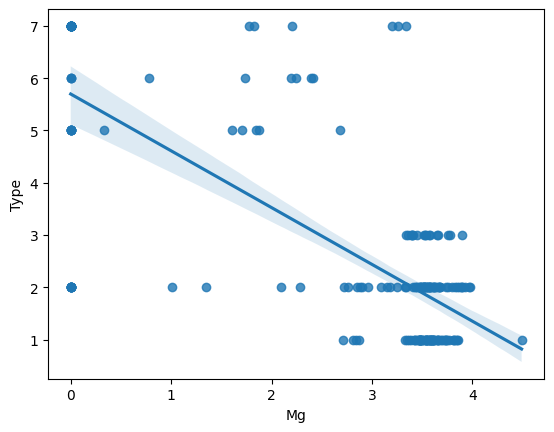

In [20]:
sns.regplot(df['Mg'],df['Type'])

<AxesSubplot:xlabel='Al', ylabel='Type'>

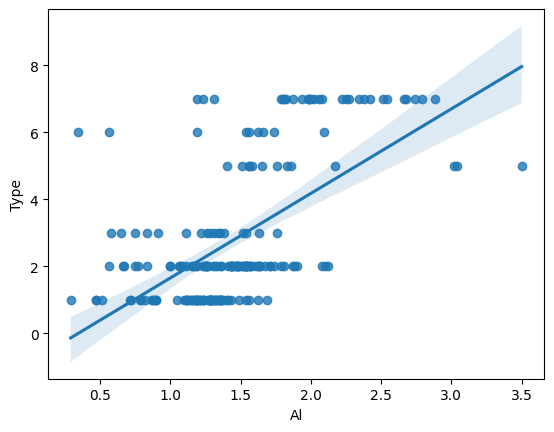

In [21]:
sns.regplot(df['Al'],df['Type'])

<AxesSubplot:xlabel='Si', ylabel='Type'>

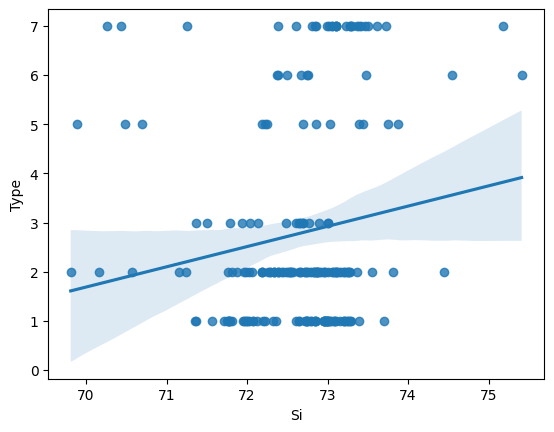

In [22]:
sns.regplot(df['Si'],df['Type'])

<AxesSubplot:xlabel='K', ylabel='Type'>

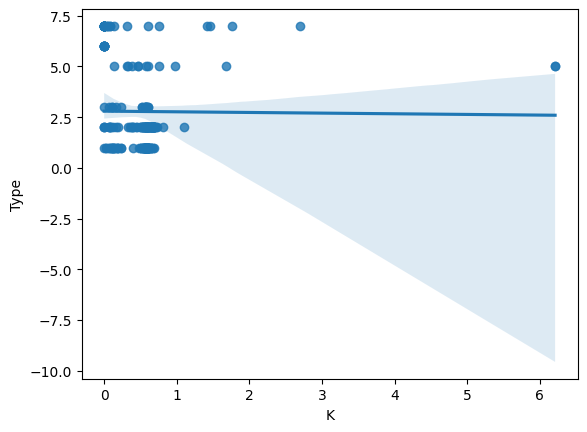

In [23]:
sns.regplot(df['K'],df['Type'])

<AxesSubplot:xlabel='Ca', ylabel='Type'>

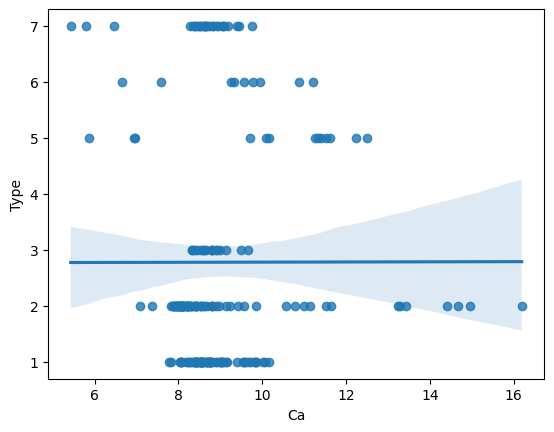

In [24]:
sns.regplot(df['Ca'],df['Type'])

<AxesSubplot:xlabel='Ba', ylabel='Type'>

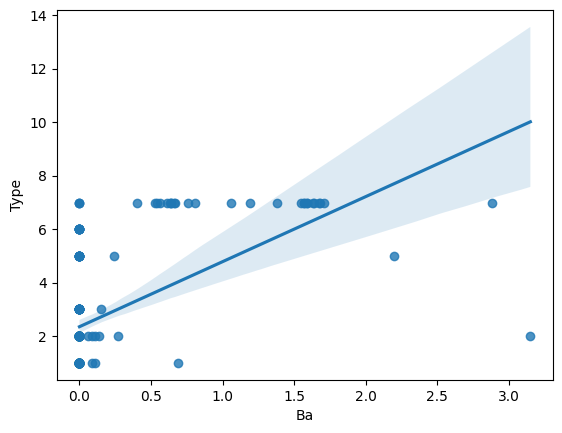

In [25]:
sns.regplot(df['Ba'],df['Type'])

<AxesSubplot:xlabel='Fe', ylabel='Type'>

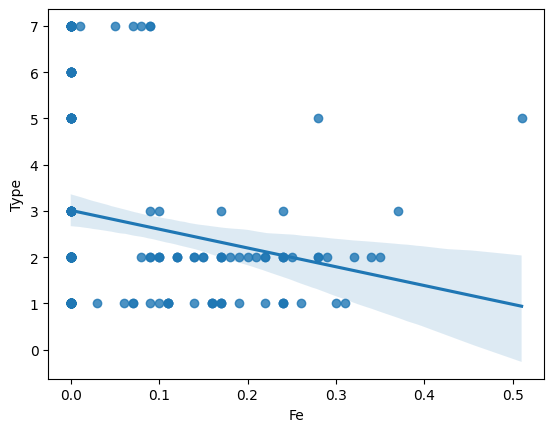

In [26]:
sns.regplot(df['Fe'],df['Type'])

### Normalizing the data

In [27]:
array = df.values
x_ind = array[:,:-1]
y_dep = array[:,-1]
scale = StandardScaler()
scaled_df = scale.fit_transform(x_ind)

In [28]:
scaled_df

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

### KNN

In [29]:
kfold = KFold(n_splits=10)

In [30]:
model = KNeighborsClassifier(n_neighbors=10)
results = cross_val_score(model, scaled_df, y_dep, cv=kfold)

In [31]:
results.mean()

0.4283549783549783

### Using GridSearch for algorithm tuning

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [33]:
import numpy
n_neighbors = numpy.array(range(3,81))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
        71, 72, 73, 74, 75, 76, 77, 78, 79, 80])}

In [34]:
KNN = KNeighborsClassifier()
grid = GridSearchCV(estimator=KNN, param_grid=param_grid)
grid.fit(x_ind, y_dep)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80])})

In [35]:
print(grid.best_score_)
print(grid.best_params_)

0.626467331118494
{'n_neighbors': 17}


##### So maximum accuracy we can get is 62 % with k =17

- want to improve the accuracy

### RandomForest Regressor

In [36]:
from sklearn.ensemble import RandomForestClassifier
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model_rf = RandomForestClassifier(n_estimators=1000, max_features=5,criterion='entropy')
results = cross_val_score(model_rf, x_ind, y_dep, cv=kfold)
print(results.mean())

0.7757575757575756


### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_ind, y_dep, train_size=0.8, random_state = 7)

In [39]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=5,random_state = 10)
model1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=10)

In [40]:
preds = model1.predict(X_test) 
np.mean(preds==y_test)

0.6744186046511628

#### RandomForestRegressor model using make regression

In [41]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


X, y = make_regression(n_targets=6,random_state=0)
print('Feature vector:', X.shape)
print('Target vector:', y.shape)

X_train, X_test, y_train, y_test = train_test_split(x_ind, y_dep, train_size=0.8, random_state=0)

print('Build and fit a regressor model...')

model = RandomForestRegressor()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

print('Done. Score', score)

Feature vector: (100, 100)
Target vector: (100, 6)
Build and fit a regressor model...
Done. Score 0.8517789660615628


- Best accuracy we got as 85.17 %